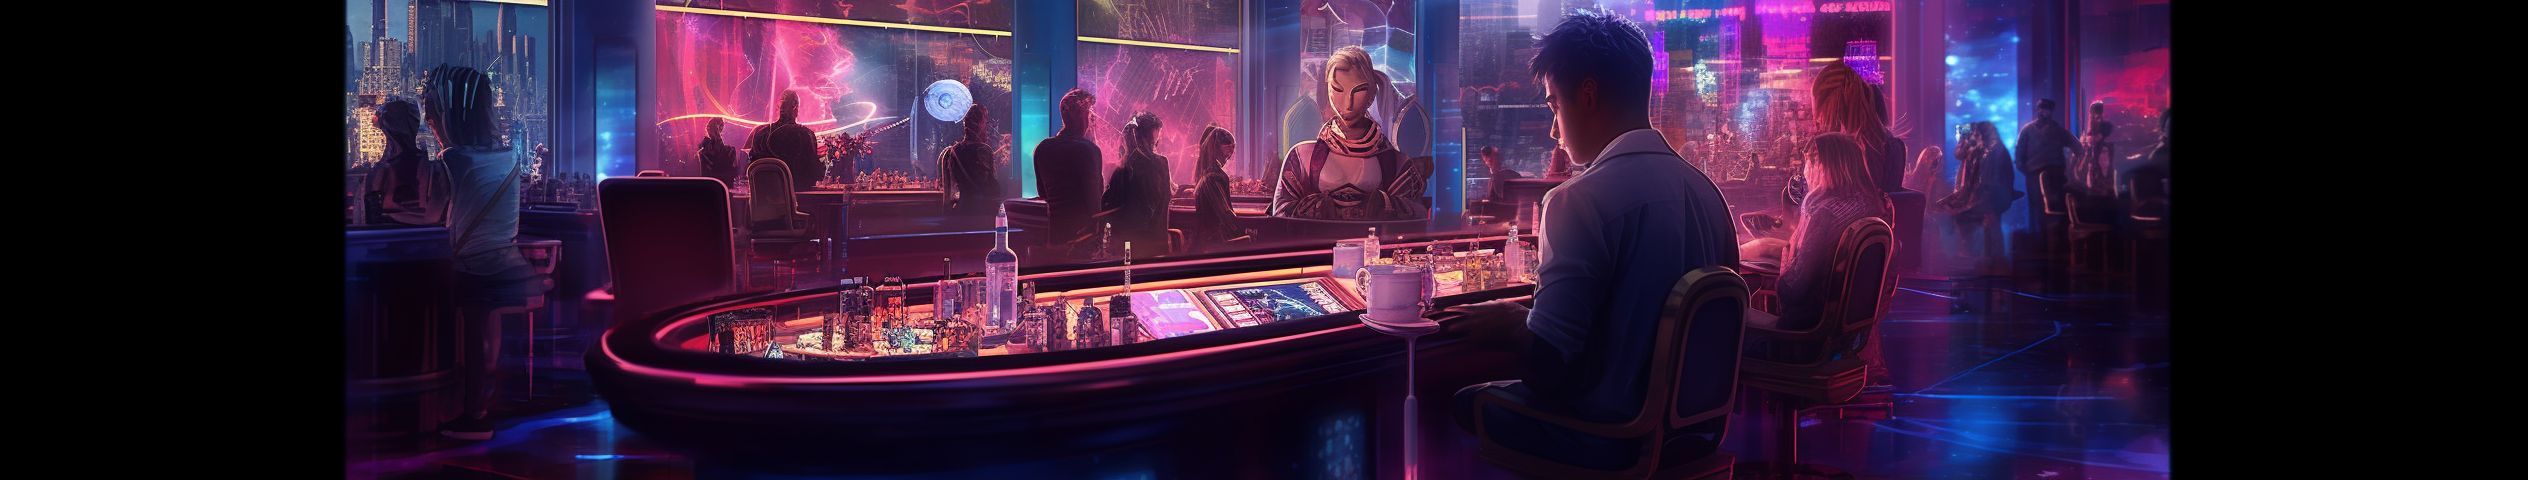

# Cryptocurrency portfolio

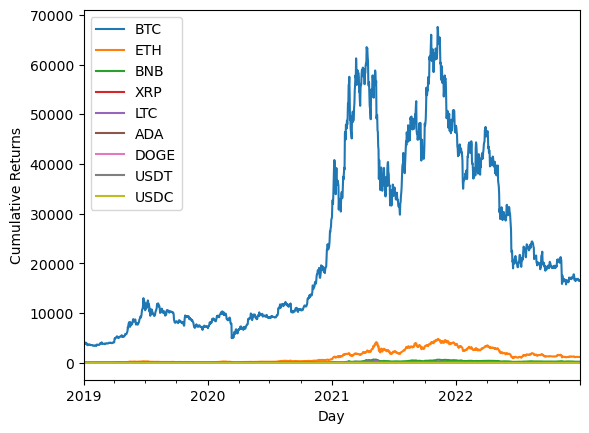

,BTC,ETH,BNB,XRP,LTC,ADA,DOGE,USDT,USDC
2019-01-01,3843.519967,140.819413,6.075273,0.364771,31.979930,0.042547,0.002392,1.018335,1.013301
2019-01-02,3943.409337,155.047677,6.188613,0.375243,33.433682,0.045258,0.002407,1.024012,1.018173
2019-01-03,3836.741319,149.135003,5.903535,0.360224,32.026699,0.042682,0.002360,1.019473,1.013577
2019-01-04,3857.717619,154.581942,6.065138,0.356747,32.404168,0.043812,0.002315,1.017200,1.008160
2019-01-05,3845.194460,155.638589,6.065543,0.355275,34.936866,0.044701,0.002319,1.018489,1.011010
...,...,...,...,...,...,...,...,...,...
2022-12-27,16717.173980,1212.791638,246.596686,0.368126,68.747909,0.260370,0.073724,0.999850,1.000169
2022-12-28,16552.571737,1189.986060,244.141926,0.356531,66.339064,0.248378,0.070381,0.999686,1.000185
2022-12-29,16642.342672,1201.595339,246.479725,0.342846,66.751077,0.244140,0.071042,0.999735,1.000138
2022-12-30,16602.585156,1199.232754,245.779223,0.345017,67.994031,0.245557,0.068404,0.999659,1.000121


In [2]:
'''
本exercise無限制使用的套件
No limit of packages uesd in this exercise
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
%matplotlib inline

'''
# Load ETFs' data
df = pd.read_csv("data\Q3_data.csv")
'''

def data_reading(crypto_name):
    with open('crypto_data.json', 'r') as f:
        data_json = f.read()
    data_dict = json.loads(data_json)
    return data_dict[crypto_name]['data']


def transform(input_data):
    output_data = [1.0]*len(input_data)
    for i in range(len(input_data)):
        if i != 0:
            fraction = input_data[i]/input_data[i-1]
            output_data[i] = output_data[i-1]*fraction
    return output_data


if __name__ == '__main__':
    currencies = ["BTC", "ETH", "BNB", "XRP", "LTC", 'ADA', "DOGE", "USDT", "USDC"]
    dates = pd.to_datetime(pd.date_range("20190101", periods=1461))
    data_array = np.empty((len(dates), len(currencies)))

    for i, coin in enumerate(currencies):
        data = data_reading(coin)
        data_array[:, i] = data

    fig, ax = plt.subplots()
    df = pd.DataFrame(data_array, index=dates, columns=currencies)

    df.plot(ax=ax)
    ax.set_xlabel('Day')
    ax.set_ylabel('Cumulative Returns')

    plt.show()

df

## Asset Allocation Strategy

請使用`data/Q3_data.csv`中的資產建構一個投資組合並進行回測。

該投資組合必須滿足

- 任意時間點需持有至少4個資產
- 任意時間點的持有的資產權重皆大於等於0，且權重總和皆為100％（即無槓桿、不允許放空）
- 任意時間點皆不允許look-ahead bias

回測的呈現必須包含
- 至少十年的回測區間
- 該投資組合的累積報酬率、權重分配
- 請使用`data/Q3/SPY.csv`作為benchmark

其他說明
- 不需考慮任何交易成本
- 不限制rebalancing的頻率
- 決策過程可使用除`data/Q3/`外的資料
- 配置的方式不限，可自由發揮，以下為可能的切入點
    - [Accelerating Dual Momentum](https://engineeredportfolio.com/2018/05/02/accelerating-dual-momentum-investing/)
    - [A Sector Rotation Strategy that. Beats the Market Handily. Especially During Crises.](https://boston.qwafafew.org/wp-content/uploads/sites/3/2020/09/A-Sector-Rotation-Strategy-that-Beats-the-MarketUpdated.pdf)
    - [The Principal Component Analysis Builds Better Portfolios Than Your ETF Provider](https://seekingalpha.com/instablog/51783937-desmond-m/5657200-principal-component-analysis-builds-better-portfolios-your-etf-provider)
    - etc.
    
    
※請善用註解說明您的邏輯


下圖為參考用範例

---
Please construct an investment portfolio using the assets in `data/Q3_data.csv` and perform backtesting.

The investment portfolio must meet the following criteria

- At least 4 assets must be held at any time.
- the weights of the held assets must be greater than or equal to 0, and the sum of the weights must be 100% at any time(i.e. no leverage or short selling is allowed).
- Look-ahead bias is not allowed at any time.

The backtesting results must include:
- Backtesting period of at least ten years.
- Cumulative return and weight allocation of the investment portfolio.
- Please Use SPY as benchmark

Other instructions
- Trading costs need not be considered.
- The rebalancing frequency is not limited.
- Data other than data/Q3_data can be used in the decision-making process.
- The allocation method is not limited and can be freely chosen. Possible starting points include:
    - [Accelerating Dual Momentum](https://engineeredportfolio.com/2018/05/02/accelerating-dual-momentum-investing/)
    - [A Sector Rotation Strategy that. Beats the Market Handily. Especially During Crises.](https://boston.qwafafew.org/wp-content/uploads/sites/3/2020/09/A-Sector-Rotation-Strategy-that-Beats-the-MarketUpdated.pdf)
    - [The Principal Component Analysis Builds Better Portfolios Than Your ETF Provider](https://seekingalpha.com/instablog/51783937-desmond-m/5657200-principal-component-analysis-builds-better-portfolios-your-etf-provider)
    - etc.


※Please use comments to explain your logic.

A sample visualization is attached below

,BTC,ETH,BNB,XRP,LTC,ADA,DOGE,USDT,USDC
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,0.025989,0.101039,0.018656,0.028708,0.045458,0.063735,0.006025,0.005576,0.004808
2019-01-03,-0.027050,-0.038135,-0.046065,-0.040024,-0.042083,-0.056937,-0.019511,-0.004433,-0.004514
2019-01-04,0.005467,0.036524,0.027374,-0.009650,0.011786,0.026480,-0.018789,-0.002230,-0.005344
2019-01-05,-0.003246,0.006836,0.000067,-0.004127,0.078160,0.020304,0.001723,0.001267,0.002826
...,...,...,...,...,...,...,...,...,...
2022-12-27,-0.011976,-0.011559,0.009822,0.006571,-0.027401,-0.018571,-0.027172,-0.000145,0.000066
2022-12-28,-0.009846,-0.018804,-0.009955,-0.031498,-0.035039,-0.046060,-0.045336,-0.000165,0.000016
2022-12-29,0.005423,0.009756,0.009576,-0.038382,0.006211,-0.017064,0.009381,0.000050,-0.000047
2022-12-30,-0.002389,-0.001966,-0.002842,0.006330,0.018621,0.005807,-0.037133,-0.000076,-0.000018


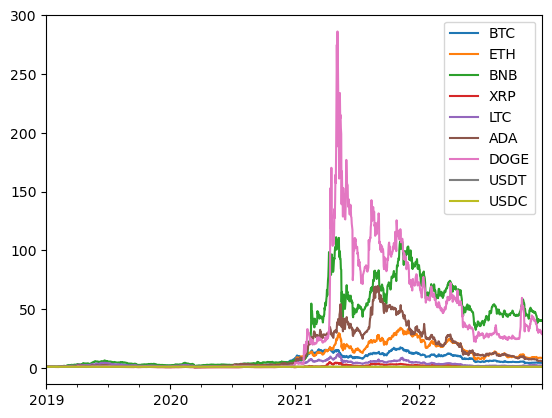

In [3]:
df_returns = df.pct_change()
(1+df_returns).cumprod().plot()
df_returns

In [46]:
def plot_performance(strategy_list, df_returns, benchmark_label=['BTC','ETH'], portfolio='portfolio', variant_list=None):
    # Plot cumulative returns
    fig, ax = plt.subplots()
    
    (1+df_returns[benchmark_label]).cumprod().plot(ax=ax, label=benchmark_label)
    for i, strategy in enumerate(strategy_list):
        (1+strategy[portfolio]).cumprod().plot(ax=ax, label=f'Strategy {i+1}')
        if(variant_list != None):
            (1+strategy[variant_list]).cumprod().plot(ax=ax, label=f'Strategy {i+1} Variant')
    
    ax.set_title('Cumulative Returns')
    ax.set_xlabel('Date')
    ax.set_ylabel('Cumulative Returns')
    ax.legend()
    plt.show()
    return None

In [28]:
#(1st test: Equal weighting)
def equalweighting(df_returns, exclude):
    # Get the assets by excluding the specified column
    assets = df_returns.columns[(df_returns.columns != exclude) & df_returns.iloc[i+1].notnull()]
    # Calculate equal weights for the assets
    weights = np.array([1/len(assets)]*len(assets))

    # Calculate and add the portfolio returns to df_returns
    strategy = df_returns
    strategy['portfolio'] = df_returns[assets].mul(weights, axis=1).sum(axis=1)
    return strategy

def allocation_equalweighting(strategy, df_returns, exclude):
    assets = df_returns.columns[df_returns.columns != exclude]
    
    # Compute equal weights at the start of each month
    df_weights = pd.DataFrame(index=df_returns.index, columns=assets)
    df_weights[:] = 1/len(assets)
    # Assuming monthly rebalancing, forward fill the weights
    df_weights = df_weights.resample('M').first().ffill()

    fig, ax = plt.subplots()
    df_weights.plot.area(ax=ax)
    ax.set_xlabel('Date')
    ax.set_ylabel('Allocation')
    ax.set_title('Asset Allocation Over Time')
    plt.show()
    return df_weights

test1 = equalweighting(df_returns.copy(), None)
test1

,BTC,ETH,BNB,XRP,LTC,ADA,DOGE,USDT,USDC,portfolio
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2019-01-02,0.025989,0.101039,0.018656,0.028708,0.045458,0.063735,0.006025,0.005576,0.004808,0.033333
2019-01-03,-0.027050,-0.038135,-0.046065,-0.040024,-0.042083,-0.056937,-0.019511,-0.004433,-0.004514,-0.030972
2019-01-04,0.005467,0.036524,0.027374,-0.009650,0.011786,0.026480,-0.018789,-0.002230,-0.005344,0.007958
2019-01-05,-0.003246,0.006836,0.000067,-0.004127,0.078160,0.020304,0.001723,0.001267,0.002826,0.011534
...,...,...,...,...,...,...,...,...,...,...
2022-12-27,-0.011976,-0.011559,0.009822,0.006571,-0.027401,-0.018571,-0.027172,-0.000145,0.000066,-0.008930
2022-12-28,-0.009846,-0.018804,-0.009955,-0.031498,-0.035039,-0.046060,-0.045336,-0.000165,0.000016,-0.021854
2022-12-29,0.005423,0.009756,0.009576,-0.038382,0.006211,-0.017064,0.009381,0.000050,-0.000047,-0.001677
2022-12-30,-0.002389,-0.001966,-0.002842,0.006330,0.018621,0.005807,-0.037133,-0.000076,-0.000018,-0.001518


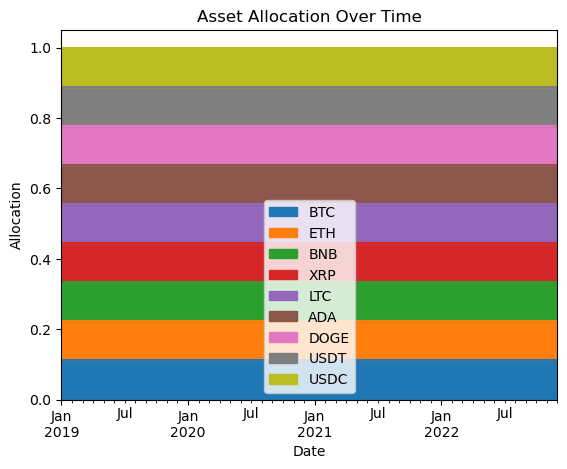

,BTC,ETH,BNB,XRP,LTC,ADA,DOGE,USDT,USDC
2019-01-31,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
2019-02-28,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
2019-03-31,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
2019-04-30,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
2019-05-31,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
2019-06-30,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
2019-07-31,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
2019-08-31,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
2019-09-30,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
2019-10-31,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111


In [159]:
weights_test1 = allocation_equalweighting(test1, df_returns.copy(), 'SPY')
weights_test1

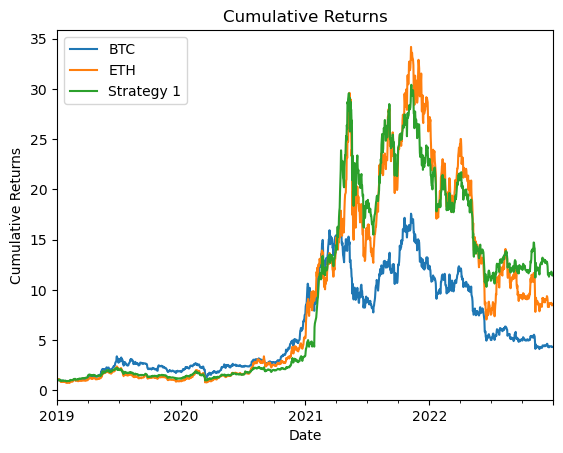

In [47]:
plot_performance([test1], df_returns.copy())

In [48]:
#(2nd test: the weight of each asset is proportional to average return rate/autocorrelation in previous year, so every day these measurement can be conduted to make new portfolio)
#Dual Momentum with escape
def dual_momentum(df, df_returns, momentum_periods, escape_periods):
    strategy = df.pct_change(periods=momentum_periods)
    strategy['Momentum Signal'] = strategy[df.columns].max(axis=1).clip(lower=0).fillna(0)

    column_labels = strategy[df.columns].idxmax(axis=1)
    df_escape = df.pct_change(periods=escape_periods)
    strategy['Momentum Signal'] = strategy['Momentum Signal'] * (df_escape.apply(lambda row: np.nan if pd.isna(column_labels[row.name]) else row[column_labels[row.name]], axis=1).clip(lower=0).fillna(0) > 0)
    strategy['Position'] = strategy['Momentum Signal'] != 0
    strategy['Position'] = strategy['Position'].astype(int).shift(1).fillna(0)
    strategy = strategy.ffill()

    column_labels = strategy[df.columns].idxmax(axis=1)
    # print(column_labels[column_labels.notna()])
    # Create a new column in strategy DataFrame named 'Market Returns'.
    # For each row in the df_returns DataFrame, do the following:
    # If the column label in 'column_labels' for the current row is NaN, then place NaN in 'Market Returns' for that row.
    # Otherwise, place the value from df_returns for that row and the column specified by 'column_labels' in 'Market Returns' for that row.
    strategy['portfolio no leave'] = df_returns.apply(lambda row: np.nan if pd.isna(column_labels.shift(2)[row.name]) else row[column_labels.shift(2)[row.name]], axis=1)
    strategy['portfolio'] = strategy['portfolio no leave'] * strategy['Position'].shift(1).fillna(0)
    return strategy

def allocation_dual_momentum(strategy, df_returns):
    # Create a DataFrame similar to df, but initially fill it with zeros
    df_weights = pd.DataFrame(0, index=df_returns.index, columns=df_returns.columns)
    column_labels = strategy[df_returns.columns].idxmax(axis=1)

    # For each date, set the column specified by column_labels to 1 and others to 0
    for date in df_weights.index:
        if pd.notna(column_labels.loc[date]):
            # Reset all columns to zero for the current date
            df_weights.loc[date, :] = 0
            # Set the column specified by column_labels to 1 for the current date
            df_weights.loc[date, column_labels.loc[date]] = 1
    # Assuming monthly rebalancing, forward fill the weights
    df_weights = df_weights.resample('5D').first().ffill()

    # Plotting
    fig, ax = plt.subplots()
    df_weights.plot.area(ax=ax)
    ax.set_xlabel('Date')
    ax.set_ylabel('Allocation')
    ax.set_title('Asset Allocation Over Time')
    plt.show()
    return df_weights

test2 = [dual_momentum(df.copy(), df_returns.copy(), 10, 20)]

test2.append(dual_momentum(df.copy(), df_returns.copy(), 10, 25))
test2.append(dual_momentum(df.copy(), df_returns.copy(), 10, 30))

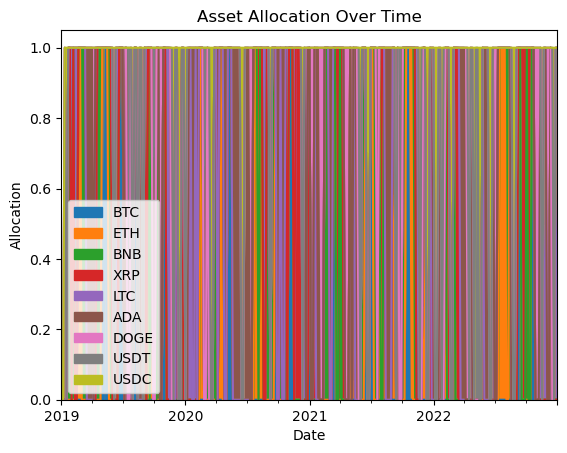

,BTC,ETH,BNB,XRP,LTC,ADA,DOGE,USDT,USDC
2019-01-01,0,0,0,0,0,0,0,0,0
2019-01-06,0,0,0,0,0,0,0,0,0
2019-01-11,0,0,0,0,0,1,0,0,0
2019-01-16,0,0,0,0,0,0,0,0,1
2019-01-21,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2022-12-11,1,0,0,0,0,0,0,0,0
2022-12-16,0,0,0,0,0,0,0,1,0
2022-12-21,0,0,0,0,0,0,0,0,1
2022-12-26,0,0,0,0,1,0,0,0,0


In [49]:
weights_test2 = allocation_dual_momentum(test2[0], df_returns.copy())
weights_test2

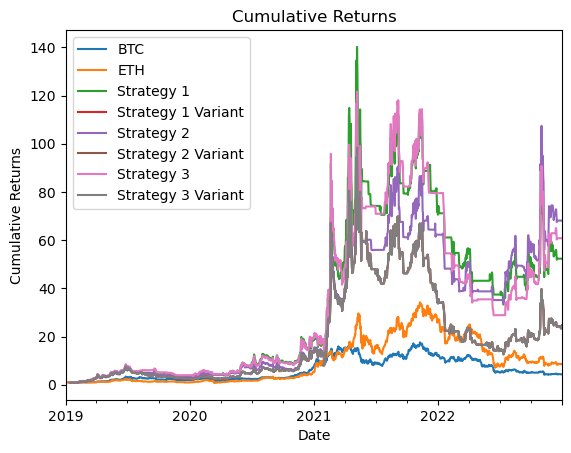

In [50]:
plot_performance(test2, df_returns.copy(), benchmark_label=['BTC','ETH'], variant_list='portfolio no leave')

In [25]:
def risk_parity(df, df_returns, lookback, exclude=['USDT','USDC']):
    #Exclude the stable coin
    df.drop(exclude, axis=1, inplace=True)
    df_returns.drop(exclude, axis=1, inplace=True)
    
    # Initialize an empty DataFrame to store the weights
    weights = pd.DataFrame(index=df.index, columns=df.columns)
    strategy = df_returns.copy()
    strategy['portfolio'] = pd.Series(index=df.index, data=np.nan)
    
    # Loop over the DataFrame row by row
    for i in range(lookback, len(df)-1):
        # Calculate the standard deviation of the returns for the lookback period
        df_normalized = df / df.iloc[0]
        std_devs = df_normalized.iloc[i-lookback:i].std()

        # Calculate the inverse of the standard deviation
        inv_std_devs = 1 / std_devs
        # Normalize the inverse standard deviations to get the portfolio weights
        weights.iloc[i] = inv_std_devs / np.sum(inv_std_devs)
        
        # Calculate the portfolio return for the next day
        strategy.iloc[i+1, strategy.columns.get_loc('portfolio')] = np.sum(weights.iloc[i] * df_returns.iloc[i+1])  # Adjust to i+1
    
    return strategy, weights


test3, weights_test3 = [risk_parity(df.copy(), df_returns.copy(), 10)[0]], [risk_parity(df.copy(), df_returns.copy(), 10)[1]]

test3.append(risk_parity(df.copy(), df_returns.copy(), 15)[0])
test3.append(risk_parity(df.copy(), df_returns.copy(), 20)[0])

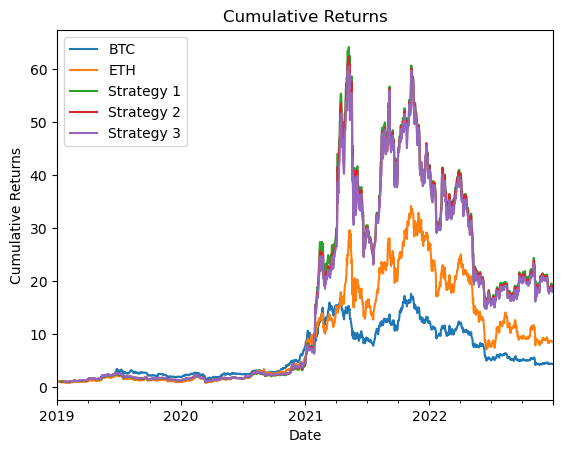

In [26]:
plot_performance(test3, df_returns.copy(), benchmark_label=['BTC','ETH'])

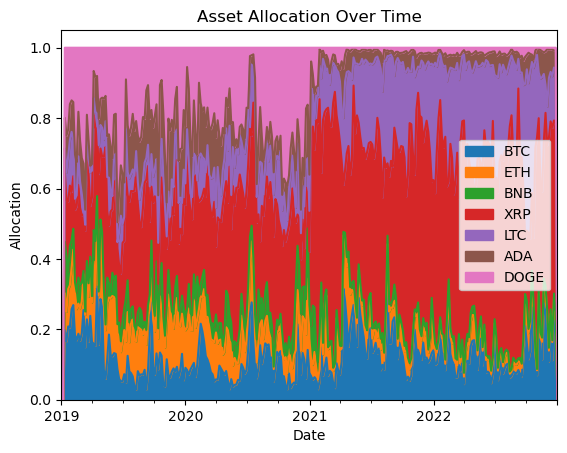

,BTC,ETH,BNB,XRP,LTC,ADA,DOGE
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-12-27,0.251796,0.061977,0.015152,0.45845,0.129056,0.074624,0.008945
2022-12-28,0.272147,0.072452,0.017468,0.397461,0.135879,0.093991,0.010601
2022-12-29,0.247032,0.077991,0.021186,0.407535,0.14737,0.089102,0.009784
2022-12-30,0.280242,0.111042,0.021847,0.371821,0.149213,0.057725,0.00811


In [27]:
def allocation_risk_parity(df_weights):
    # Assuming monthly rebalancing, forward fill the weights
    df_weights = df_weights.fillna(0).resample('5D').first().ffill()

    # Plotting
    fig, ax = plt.subplots()
    df_weights.plot.area(ax=ax)
    ax.set_xlabel('Date')
    ax.set_ylabel('Allocation')
    ax.set_title('Asset Allocation Over Time')
    plt.show()
    return None

allocation_risk_parity(weights_test3[0])
weights_test3[0]

## Bonus
- 創造能穩定贏過SPY的投資組合
- 提供更詳盡的報表（如Sharpe Ratio、Max Drawdown等風險指標）


In [308]:
# Bonus

## TODO

End of Exercise 3